Importing required libraries

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Downloading data for stocks of Google, ONGC, Adani Enterprises, Reliance and HDFC Bank

In [10]:
google = yf.download('GOOG', '2022-01-01', '2023-01-01')
hindustan_oil = yf.download('HINDOILEXP.NS', '2022-01-01', '2023-01-01')
adani = yf.download('ADANIENT.NS', '2022-01-01', '2023-01-01')
reliance = yf.download('RELIANCE.NS', '2022-01-01', '2023-01-01')
hdfc = yf.download('HDFCBANK.NS', '2022-01-01', '2023-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Computing the Open/Close, Open/Low, High/Low, High/Close ratios for all stocks

In [11]:
for stock in [google, hindustan_oil, adani, reliance, hdfc]:
    stock['Open/Close'] = stock['Open'] / stock['Close']
    stock['Open/Low'] = stock['Open'] / stock['Low']
    stock['High/Low'] = stock['High'] / stock['Low']
    stock['High/Close'] = stock['High'] / stock['Close']

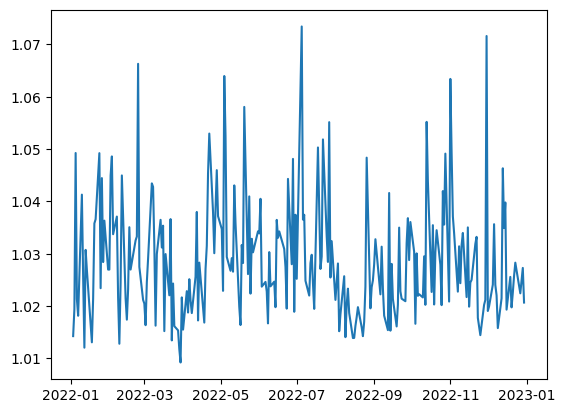

In [12]:
plt.figure()
plt.plot(google.index,google['High/Low'])

Calculating when the Open/Close ratio is between (0.35, 0.5), (0.5, 1), (1, 3.5)

In [13]:
a = 0
b = 0
c = 0

for stock in [google, hindustan_oil, adani, reliance, hdfc]:
    temp = stock['Open/Close']
    temp = temp[temp >= 0.35]
    temp = temp[temp < 0.5]
    a += temp.size
    temp = stock['Open/Close']
    temp = temp[temp >= 0.5]
    temp = temp[temp < 1]
    b += temp.size
    temp = stock['Open/Close']
    temp = temp[temp >= 1]
    temp = temp[temp < 3.5]
    c += temp.size

print("a = {}, b = {}, c = {}".format(a, b, c))
    


a = 0, b = 621, c = 622


Plot the candlestick chart for a selected stock

<BarContainer object of 128 artists>

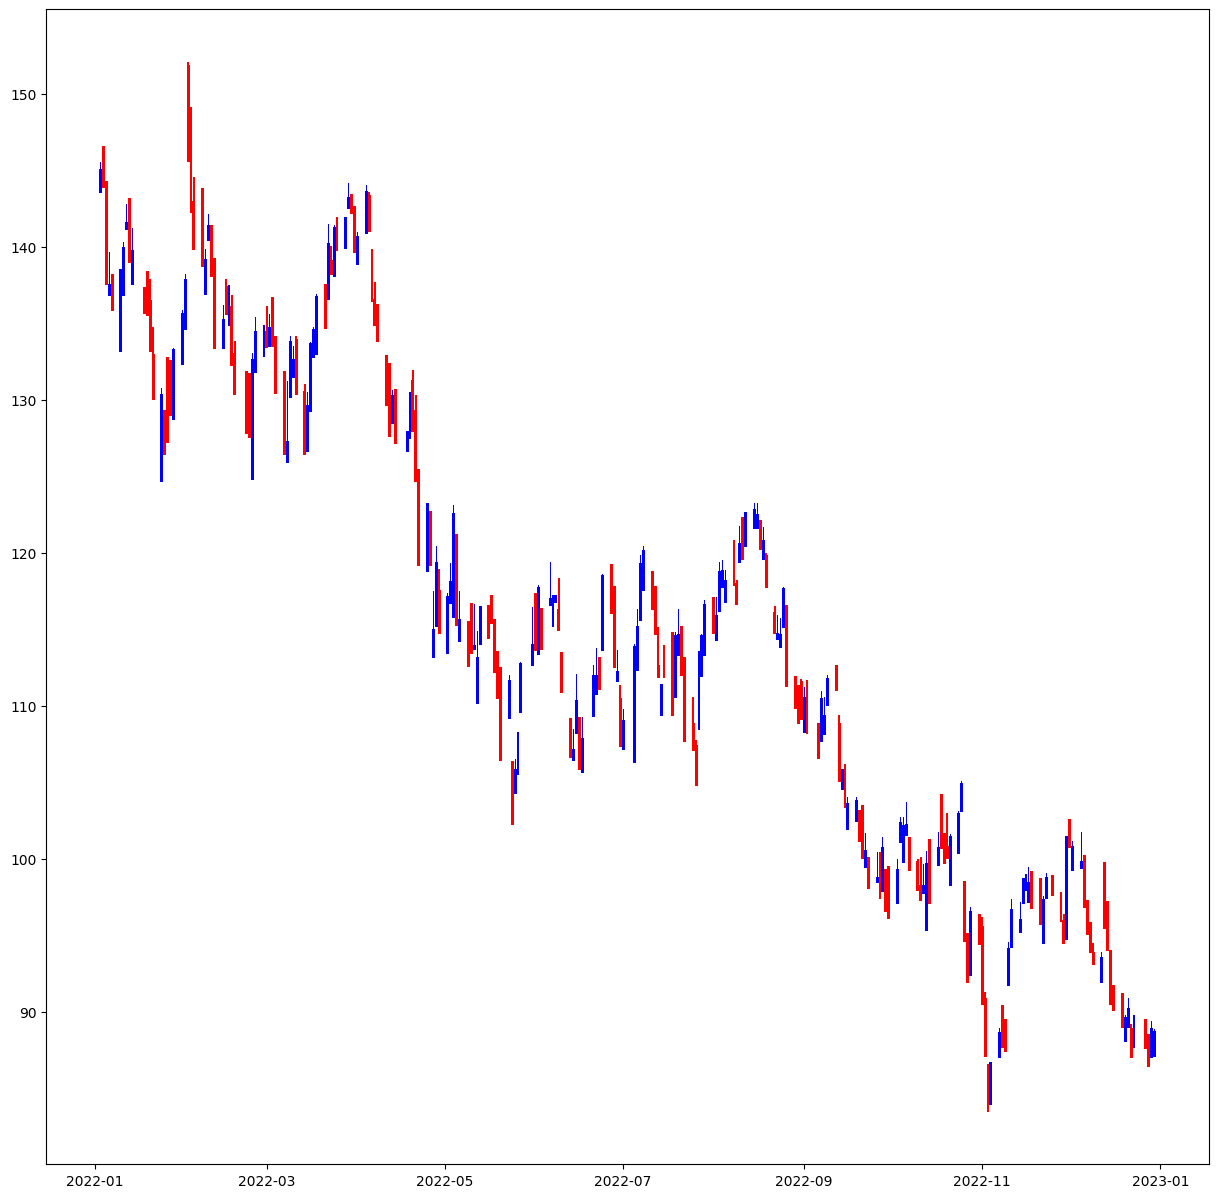

In [14]:
stock = google
up = stock[stock['Close'] > stock['Open']]
down = stock[stock['Close'] < stock['Open']]

plt.figure(figsize=(15,15))

plt.bar(up.index, up['Close'] - up['Open'], 1, bottom=up['Open'], color='blue')
plt.bar(up.index, up['High'] - up['Close'], 0.3, bottom=up['Close'], color='blue')
plt.bar(up.index, up['Low'] - up['Open'], 1, bottom=up['Open'], color='blue')

plt.bar(down.index, down['Close'] - down['Open'], 1, bottom=down['Open'], color='red')
plt.bar(down.index, down['High'] - down['Close'], 0.9, bottom=down['Close'], color='red')
plt.bar(down.index, down['Low'] - down['Open'], 1, bottom=down['Open'], color='red')

Comparing closing prices of 2 stocks

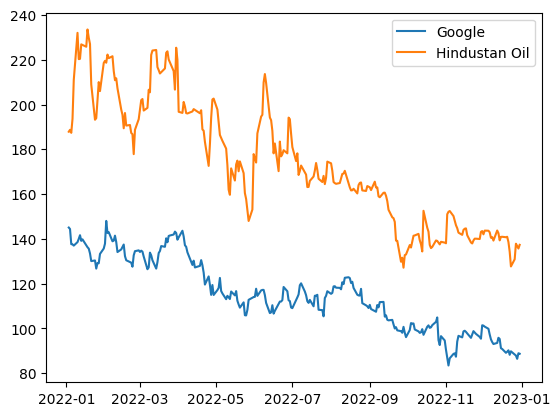

In [16]:
stock1 = google
stock2 = hindustan_oil

plt.figure()
plt.plot(stock1.index, stock1['Close'], label='Google')
plt.plot(stock2.index, stock2['Close'], label='Hindustan Oil')
plt.legend()